In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [25]:
data = pd.read_csv('./csv/boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


<Axes: >

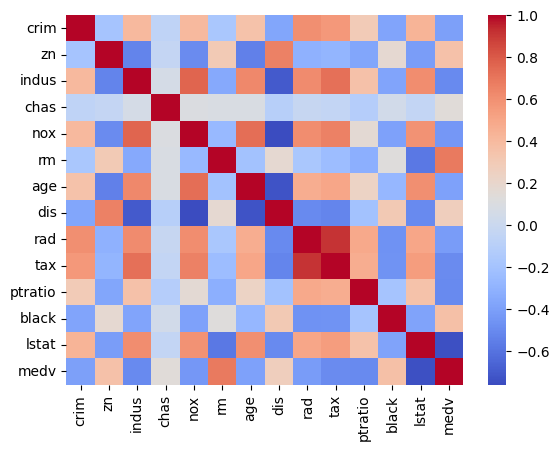

In [26]:
sns.heatmap(data.corr(),fmt='.2f', cmap='coolwarm')

In [27]:
abs(data.corr()['medv']).sort_values()

chas       0.141400
dis        0.264876
zn         0.355608
black      0.360071
age        0.390863
crim       0.400956
rad        0.423508
nox        0.439225
tax        0.495792
indus      0.501698
ptratio    0.506313
rm         0.683541
lstat      0.742695
medv       1.000000
Name: medv, dtype: float64

<Axes: xlabel='lstat', ylabel='medv'>

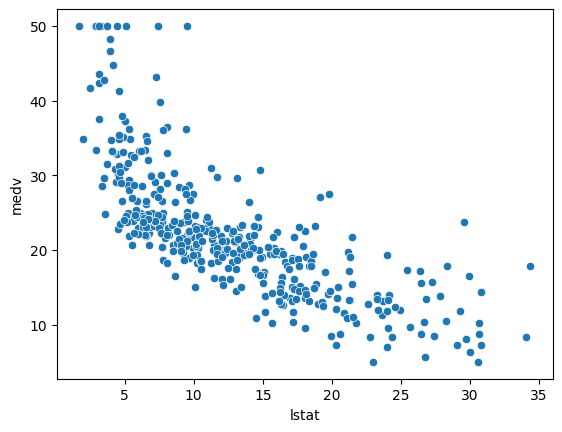

In [28]:
sns.scatterplot(x=data.lstat, y=data.medv)

In [29]:
y=data['medv']
X=pd.DataFrame(data['lstat'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [30]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [31]:
learning_rate = 0.01
x=1000

In [32]:
class MyGradientDescent:
    def __init__(self,learning_rate):
        self.learning_rate = learning_rate
        self.beta1 = 0
        self.beta0 = 0
    def fit(self, X, y, epochs=100):
        N=len(X)
        history = []
        for e in range(epochs):
            for i in range(N):
                Xi = X[i,:]
                yi = y.iloc[i]

                hi=self.beta0 + self.beta1*Xi
                f=hi - yi
                self.beta1 -= self.learning_rate*2 / N * f * Xi
                self.beta0 -= self.learning_rate*2 / N * f

            loss = mean_squared_error(y, (self.beta1*X + self.beta0))

            if e % 100 == 0:
                print(f"Epoch {e}, Loss: {loss}")

            history.append(loss)
        return history

    def predict(self, X):
        return self.beta0 + self.beta1 * X


In [33]:
model = MyGradientDescent(learning_rate)
history = model.fit(X_train_scl, y_train, epochs=x)
predictions = model.predict(X_test_scl)

Epoch 0, Loss: 555.4547805045436
Epoch 100, Loss: 45.50154202643327
Epoch 200, Loss: 36.16170328551317
Epoch 300, Loss: 35.99042685940659
Epoch 400, Loss: 35.987256662664166
Epoch 500, Loss: 35.98719402774878
Epoch 600, Loss: 35.987192260508245
Epoch 700, Loss: 35.987192144208066
Epoch 800, Loss: 35.98719213071977
Epoch 900, Loss: 35.98719212893573


Text(0.5, 1.0, 'Loss vs Epochs')

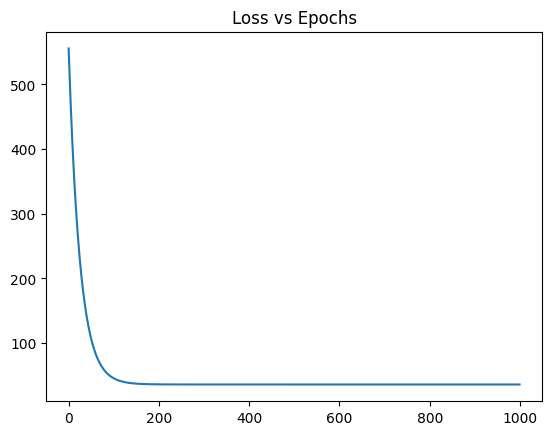

In [34]:
sns.lineplot(x=range(len(history)), y=history)
plt.title('Loss vs Epochs')

<Axes: ylabel='medv'>

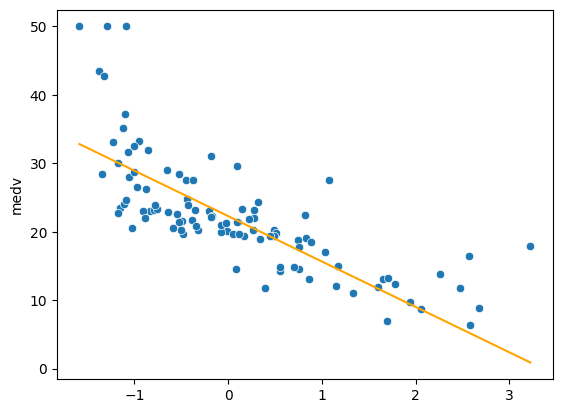

In [35]:
sns.scatterplot(x=X_test_scl[:,0], y=y_test)
sns.lineplot(x=X_test_scl[:,0], y=predictions[:,0], color='orange')

In [36]:
mean_squared_error(y_test, predictions)

32.008910136931455

In [37]:
print(model.beta1)
print(model.beta0)

[-6.64058089]
[22.28345459]


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scl, y_train)
predictions_sklearn = model.predict(X_test_scl)
mean_squared_error(y_test, predictions_sklearn)

32.008766621921545

In [39]:
print(model.coef_)
print(model.intercept_)

[-6.6407313]
22.283828382838283


<Axes: ylabel='medv'>

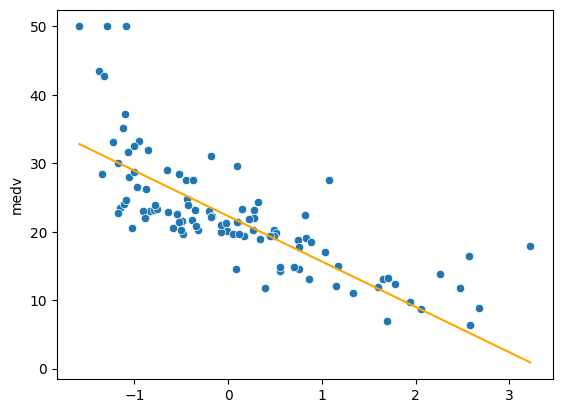

In [40]:
sns.scatterplot(x=X_test_scl[:,0], y=y_test)
sns.lineplot(x=X_test_scl[:,0], y=predictions_sklearn, color='orange')

In [ ]:
class MyGradientDescent2:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.m = X.shape[1]
        self.n = X.shape[0]
        self.w = np.zeros(self.m)
        self.b = 0
        self.losses = []

        for i in range(self.n_iter):
            y_predicted = np.dot(X, self.w) + self.b
            dw = (1 / self.n) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.n) * np.sum(y_predicted - y)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            loss = mean_squared_error(y, y_predicted)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.w) + self.b

[-6.64044461]
22.282866362169916


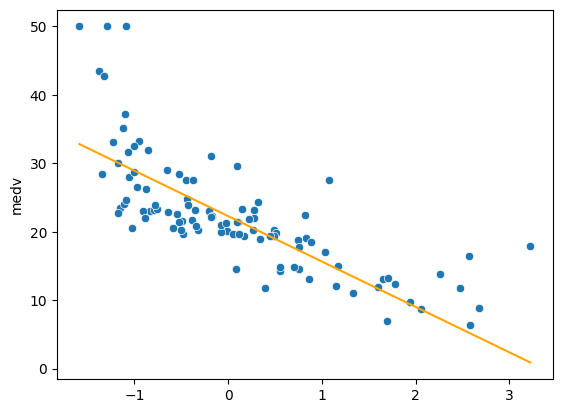

In [41]:
myModel = MyGradientDescent2(learning_rate=0.01, n_iter=1000)
myModel.fit(X_train_scl, y_train)
predictions = myModel.predict(X_test_scl)
sns.scatterplot(x=X_test_scl[:,0], y=y_test)
sns.lineplot(x=X_test_scl[:,0], y=predictions, color='orange')
mean_squared_error(y_test, predictions)
print(myModel.w)
print(myModel.b)
